# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
data_children=data.groupby('children').agg({'debt':['count','sum']})

data_children['% просрочек']=data.groupby('children')['debt'].sum()/data.groupby('children')['debt'].count()*100
data_children=data_children.rename(columns={'debt':'Количество кредитов и просрочек'})

print('Сводная таблица кредитов и просрочек по категориям количества детей заемщиков\n',' \n', data_children)

Сводная таблица кредитов и просрочек по категориям количества детей заемщиков
  
          Количество кредитов и просрочек       % просрочек
                                   count   sum            
children                                                  
0                                  14091  1063    7.543822
1                                   4808   444    9.234609
2                                   2052   194    9.454191
3                                    330    27    8.181818
4                                     41     4    9.756098
5                                      9     0    0.000000


**Вывод:** Имеется зависимость между количеством детей и возвратом кредита в срок - при наличии детей вероятность просрочки платежей по кредиту увеличивается с 7,5% до 9,8%, исключение - наличие 5 детей, однако ввиду малого количества кредитов данной категории ею можно пренебречь.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [23]:
# Ваш код будет здесь. Вы можете создавать новые ячейки.
data_family=data.groupby('family_status').agg({'debt':['count','sum']})

data_family['% просрочек']=data.groupby('family_status')['debt'].sum()/data.groupby('family_status')['debt'].count()*100
data_family=data_family.rename(columns={'debt':'Количество кредитов и просрочек'})

print('Сводная таблица кредитов и просрочек по категориям семейного статуса заемщиков\n',' \n', data_family)


Сводная таблица кредитов и просрочек по категориям семейного статуса заемщиков
  
                       Количество кредитов и просрочек      % просрочек
                                                count  sum            
family_status                                                         
Не женат / не замужем                            2796  273    9.763948
в разводе                                        1189   84    7.064760
вдовец / вдова                                    951   63    6.624606
гражданский брак                                 4134  385    9.313014
женат / замужем                                 12261  927    7.560558


**Уточненный вывод:** Выявлена значительная разница по проценту просрочек между различными категориями семейного статуса заемщиков. Наиболее добросовестными заемщиками являются вдовцы (% просрочек = 6,62), неженатые заемщики относятся к категории повышенного риска - % просрочек = 9,76. 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [24]:

data_inc=data.groupby('total_income_category').agg({'debt':['count','sum']})

data_inc['% просрочек']=data.groupby('total_income_category')['debt'].sum()/data.groupby('total_income_category')['debt'].count()*100
data_inc=data_inc.rename(columns={'debt':'Количество кредитов и просрочек'})

print('Сводная таблица кредитов и просрочек по категориям уровня доходов заемщиков\n',' \n', data_inc)


Сводная таблица кредитов и просрочек по категориям уровня доходов заемщиков
  
                       Количество кредитов и просрочек       % просрочек
                                                count   sum            
total_income_category                                                  
A                                                  25     2    8.000000
B                                                5014   354    7.060231
C                                               15921  1353    8.498210
D                                                 349    21    6.017192
E                                                  22     2    9.090909


**Уточненный вывод:** Наиболее многочисленная категория заемщиков - люди с доходом от 50 тыс. до 200 тыс. в месяц, риск невозврата кредита составляет 8,5%. Далее идет категория заемщиков с доходом от 200 тыс. до 1 млн. в месяц, риск невозврата кредита снижается до 7,06%, это менее рискованная категория заемщиков.
Люди с минимальным доходом имеют больший риск невозврата кредита (9%), люди с доходом от 30 до 50 тыс. рублей являются наиболее добросовестными заемщиками.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [25]:
data_aim=data.groupby('purpose_category').agg({'debt':['count','sum']})

data_aim['% просрочек']=data.groupby('purpose_category')['debt'].sum()/data.groupby('purpose_category')['debt'].count()*100
data_aim=data_aim.rename(columns={'debt':'Количество кредитов и просрочек'})

print('Сводная таблица кредитов и просрочек по целям кредита заемщиков\n',' \n', data_aim)



Сводная таблица кредитов и просрочек по целям кредита заемщиков
  
                          Количество кредитов и просрочек      % просрочек
                                                   count  sum            
purpose_category                                                         
операции с автомобилем                              4279  400    9.347978
операции с недвижимостью                           10751  780    7.255139
получение образования                               3988  369    9.252758
проведение свадьбы                                  2313  183    7.911803


**Вывод:** Цели кредита влияют на его возврат в срок - реже всего происходит просрочка платежей по кредитам на недвижимость и свадьбу. Кредиты на автомобиль и образование с большей вероятностью будут просрочены.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* возможной причиной пропусков в исходных данных является человеческий фактор - допущены пропуски при заполнении заявлений на предоставление кредита получаталем, либо менеджером банка. 

<b>Уточненный вывод: Также возможной причиной пропусков в данных могут быть программные сбои при обработке или передаче форм заявлений на предоставление кредита, либо дефекты самих форм. Также могут возникать ошибки при форматировании исходных данных.</b>

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

In [26]:
print(data.groupby('income_type').agg({'days_employed':['median','mean']}))

                 days_employed               
                        median           mean
income_type                                  
безработный      366413.652744  366413.652744
в декрете          3296.759962    3296.759962
госслужащий        2689.137274    3332.636454
компаньон          1555.947387    2062.884254
пенсионер        365286.622650  365051.368541
предприниматель     520.848083     520.848083
сотрудник          1572.328285    2250.942428
студент             578.751554     578.751554


*Ответ:* Заполнение пропусков медианным значением по категории является лучшим решением ввиду того, что при таком заполнении отсутствует искажение данных по категориям и удобнее проводить анализ данных. 

<b>Уточненный вывод:

анализ сводной сравнительной таблицы средних и медианных значений по столбцу days_employed показывает, что несмотря на то, что медианное и среднее значение иногда совпадают,  медианное значение не берет в расчет максимальные и минимальные показатели из выборки, искажающие результаты подсчета, и отражает наиболее близкий уровень к реальному среднему показателю выборки.

В данном случае, применение средних значений для заполнения отсутствующих данных в датафрейме привело бы к искажению представления о стаже заемщиков по категориям (в большинстве случаев, стаж был бы существенно завышен)</b>

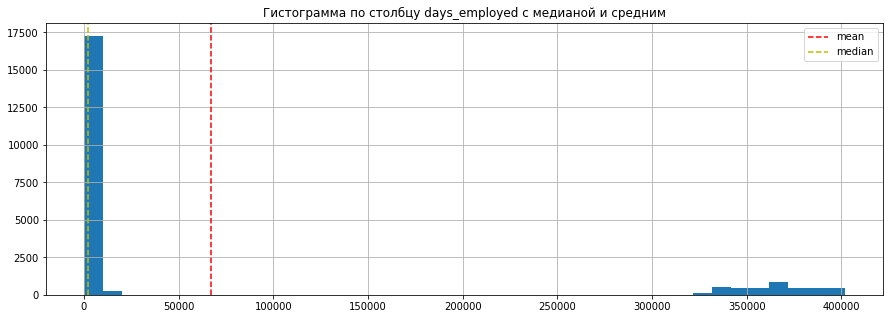

In [28]:
# Код ревьюера
import matplotlib.pyplot as plt

plt.figure(figsize = (15,5))

ax = data['days_employed'].hist(bins = 40)

ax.axvline(x = data['days_employed'].mean(), color = 'r', linestyle = 'dashed', label = 'mean')
ax.axvline(x = data['days_employed'].median(), color = 'y', linestyle = 'dashed', label = 'median')
plt.legend()
plt.title('Гистограмма по столбцу days_employed с медианой и средним')
plt.show()

### Шаг 4: общий вывод.

На основе анализа полученных данных имеются следующие выводы:
1. имеется взаимосвязь между целями кредита и риском его невозврата
2. имеется информация, что наиболее частой целью кредитования являются операции с недвижимостью
3. четкой зависимости от количества детей или дохода заемщика при расчете риска невозврата кредита не выявлено.








<b>Уточненный вывод по результатам проверки</b>

В рамках настоящего проекта проведен анализ данных о более чем 20 000 заемщиков в целях выявления закономерностей между различными категориями заемщиков и риском невозврата кредитов, определения типа наиболее добросовестного заемщика, а также факторов, увеличивающих риски банка, связанные с кредитованием.

Исходные данные представлены в виде csv- файла с указанием следующих сведений о каждом заемщике:
-	количество детей в семье
-	общий трудовой стаж в днях
-	возраст клиента в годах
-	уровень образования клиента
-	идентификатор уровня образования
-	семейное положение
-	идентификатор семейного положения
-	пол клиента
-	тип занятости
-	имел ли задолженность по возврату кредитов
-	ежемесячный доход
-	цель получения кредита

2174 записи в исходных данных содержали пропуски в разделах "стаж" и "ежемесячный доход". В ходе предобработки данных в целях корректного анализа выявленные пропуски были заполнены медианными значениями, рассчитанными из типа занятости заемщика.

Также в ходе предварительной обработки были выявлены и скорректированы аномальные значения в разделе "стаж".

После выполнения указанных операций произведена предварительная обработка данных о количестве детей - исключены некорректные и аномальные значения.

Далее в ходе исследования в целях исключения искажения результатов произведен поиск и удаление явных и неявных дубликатов.

На следующем этапе исследования произведена категоризация заемщиков по уровню среднемесячного дохода на 5 групп:
- 0–30000 руб/мес. - присвоена категория 'E';
- 30001–50000 руб/мес. - присвоена категория  'D';
- 50001–200000 руб/мес. - присвоена категория  'C';
- 200001–1000000 руб/мес. - присвоена категория  'B';
- 1000001 руб/мес.и выше  - присвоена категория  'A'.

Также произведена категоризация заемщиков по целям кредитования на следующие группы:
- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

После выполнения указанных операций проведен комплексный анализ данных по различным параметрам. 
По результатам анализа выявлены следующие закономерности:

1. Имеется зависимость между количеством детей и возвратом кредита в срок - при наличии детей вероятность просрочки платежей по кредиту увеличивается с 7,5% до 9,8%, исключение - наличие 5 детей, однако ввиду малого количества кредитов данной категории ею можно пренебречь.

2. Выявлена значительная разница по проценту просрочек между различными категориями семейного статуса заемщиков. Наиболее добросовестными заемщиками являются вдовцы (% просрочек = 6,62), неженатые заемщики относятся к категории повышенного риска - % просрочек = 9,76.

3. Наиболее многочисленная категория заемщиков - люди с доходом от 50 тыс. до 200 тыс. в месяц, риск невозврата кредита составляет 8,5%. Далее идет категория заемщиков с доходом от 200 тыс. до 1 млн. в месяц, риск невозврата кредита снижается до 7,06%, это менее рискованная категория заемщиков. Люди с минимальным доходом имеют больший риск невозврата кредита (9%), люди с доходом от 30 до 50 тыс. рублей являются наиболее добросовестными заемщиками.

4. Цели кредита влияют на его возврат в срок - реже всего происходит просрочка платежей по кредитам на недвижимость и свадьбу. Кредиты на автомобиль и образование с большей вероятностью будут просрочены.

Резюмируя выявленные закономерности можно условно определить тип заемщика с минимальным риском невозврата кредита:
бездетный, вдовец (либо в браке), уровень дохода  - от 200 тыс. до 1 млн. в месяц, цель кредитования - сделки с недвижимостью.

Также определен тип заемщика с наиболее высоким риском невозврата кредита:
имеющий детей, не в браке, уровень дохода - до 30 тыс. руб. в месяц, цель кредитования - на автомобиль или проведение свадьбы.

В качестве рекомендации по улучшению сбора данных (уменьшению искажений) можно порекомендовать при заполнении форм на выдачу кредита делать обязательным указание размера среднемесячного дохода, установить категории целей выдачи кредита в формы заявок, проверять корректность указания стажа в формах.











